In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from pandas import ExcelWriter
pd.options.mode.chained_assignment = None 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import graphviz
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', 50)
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


# Importing libraries to perform decision trees as well as 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime 
## importing all relevant packages

In [2]:
ca = pd.read_csv('CAvideos.csv')

In [3]:
timedate_split = ca['publish_time'].str.split('T', 1)
ca['date'] = timedate_split.str.get(0)
## extracting date from publish_time column where date and time lived in the same column

In [4]:
ca['publish_date'] = pd.to_datetime(ca['date'], format="%Y-%m-%d")
## converting date to date format via pandas

In [5]:
ca['month'] = ca['publish_date'].dt.month
## extracting month from publish date column

In [6]:
ca=ca.drop(['thumbnail_link','description','tags','video_id',], axis=1)
## dropping columns we won't use - did not want to pursue NLP/sentiment analysis

In [7]:
ca["comments_disabled"] = ca["comments_disabled"].astype('category').cat.codes
ca["ratings_disabled"] = ca["ratings_disabled"].astype('category').cat.codes
ca["video_error_or_removed"] = ca["video_error_or_removed"].astype('category').cat.codes
## converting categorical/ true or false columns into categorically coded variables

In [8]:
ca['trendingdate'] = pd.to_datetime(ca['trending_date'], format="%y.%d.%m").dt.date
## converting trending_date column into date format

In [9]:
ca['publish_date'] = pd.to_datetime(ca['publish_date'], format="%y.%d.%m").dt.date
## converting publish_date column into date format

In [10]:
ca['trending_days'] = ca['trendingdate'] - ca['publish_date']
## creating column showing how many days it took a video to trend by subtracting publish and trending dates

In [11]:
ca['days_to_trend'] = ca['trending_days'].dt.days
## converting days to trend column into days column

In [12]:
mean_value=ca['days_to_trend'].mean()
mean_value
## calculating average time it takes for a video to trend

3.4814950710599057

In [15]:
ca['trending_binary'] = [0 if x < 3.4814950710599057  else 1 for x in ca['days_to_trend']]
## creating a column that has binary code for if a video trended within average time or not. 
## 0 = did not trend within average, 1 = did trend within average

In [16]:
ca[np.isfinite(pd.to_numeric(ca.category_id, errors="coerce"))]
## data had error where columns leaked into one another 
## EX: category_id column had some rows where title was in it
## this line of code solves that problem by replacing all strings with numeric values

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,date,publish_date,month,trendingdate,trending_days,days_to_trend,trending_binary
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,17158579,787425,43420,125882,0,0,0,2017-11-10,2017-11-10,11,2017-11-14,4 days,4,1
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,1014651,127794,1688,13030,0,0,0,2017-11-13,2017-11-13,11,2017-11-14,1 days,1,0
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146035,5339,8181,0,0,0,2017-11-12,2017-11-12,11,2017-11-14,2 days,2,0
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095828,132239,1989,17518,0,0,0,2017-11-12,2017-11-12,11,2017-11-14,2 days,2,0
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,33523622,1634130,21082,85067,0,0,0,2017-11-09,2017-11-09,11,2017-11-14,5 days,5,1
5,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,1309699,103755,4613,12143,0,0,0,2017-11-13,2017-11-13,11,2017-11-14,1 days,1,0
6,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,2987945,187464,9850,26629,0,0,0,2017-11-12,2017-11-12,11,2017-11-14,2 days,2,0
7,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57534,2967,15959,0,0,0,2017-11-13,2017-11-13,11,2017-11-14,1 days,1,0
8,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,4477587,292837,4123,36391,0,0,0,2017-11-12,2017-11-12,11,2017-11-14,2 days,2,0
9,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,505161,4135,976,1484,0,0,0,2017-11-10,2017-11-10,11,2017-11-14,4 days,4,1


In [17]:
subset_df = pd.get_dummies(ca['month'])
## creating subset with dummy variables for month column

In [18]:
final_df = pd.concat([ca, subset_df],axis=1, sort=False)
## combining subset with dummy variables to original dataset

In [19]:
final_df = final_df.rename(columns={1: "January", 2: "February", 3:"March", 4: "April",
                        5:"May", 6: "June",7:"July", 8:"August", 9:"September",
                       10:"October", 11:"November", 12:"December"})
## renaming month columns for dummy variables

In [20]:
final_df=final_df.drop(['publish_time','month',], axis=1)
## dropping publish time and month columns

In [21]:
final_df['ln_views'] = np.log(final_df['views']+1)
final_df['ln_likes'] = np.log(final_df['likes']+1)
final_df['ln_dislikes'] = np.log(final_df['dislikes']+1)
final_df['ln_comment_count'] = np.log(final_df['comment_count']+1)
## log transforming variables to achieve normal distribution 

In [22]:
final_df['month'] = ca['month']
## remembered i needed old month column for future functions, brought it from old dataset.

In [23]:
by_month = final_df.groupby(['month'])['views'].sum().reset_index()
## grouping video views by month using sum

In [24]:
by_month

,month,views
0,1,5615972300
1,2,6241318931
2,3,6596207816
3,4,5428120257
4,5,8046080018
5,6,2736253422
6,7,2536355
7,8,1246732
8,9,8098136
9,10,22815422


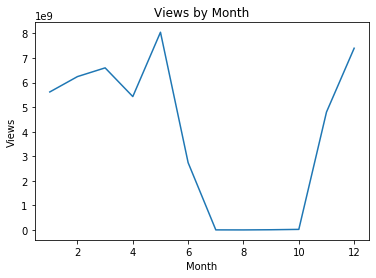

In [25]:
plt.plot(by_month['month'], by_month['views'])
plt.title('Views by Month')
plt.xlabel('Month')
plt.ylabel('Views')
plt.show()
## plotting video views by month. 

In [27]:
by_cat = final_df.groupby(['category_id'])['views'].sum().reset_index()
## grouping video views by category using sum

In [28]:
by_cat

,category_id,views
0,1,2939060844
1,2,200066074
2,10,13179850194
3,15,235592173
4,17,2997652188
5,19,143746952
6,20,1241532385
7,22,3228227926
8,23,3708438785
9,24,13671215509


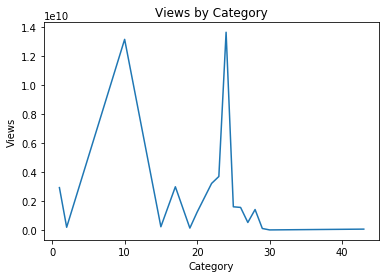

In [29]:
plt.plot(by_cat['category_id'], by_cat['views'])
plt.title('Views by Category')
plt.xlabel('Category')
plt.ylabel('Views')
plt.show()
## plotting video views by category. 

In [30]:
cat_trend = final_df.groupby(['category_id'])['days_to_trend'].mean().reset_index()
## grouping videos by category id and average time it takes to trend

In [31]:
cat_trend

,category_id,days_to_trend
0,1,7.747087
1,2,3.861190
2,10,5.155990
3,15,1.962060
4,17,1.490850
5,19,1.790816
6,20,2.996280
7,22,3.648477
8,23,6.055129
9,24,2.355736


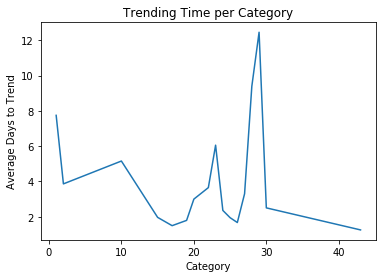

In [32]:
plt.plot(cat_trend['category_id'], cat_trend['days_to_trend'])
plt.title('Trending Time per Category')
plt.xlabel('Category')
plt.ylabel('Average Days to Trend')
plt.show()
## graph showing categories and corresponding average trend

In [38]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(X)
scaler.transform(X)
## scaling variables to assist algorithm in producing better results

array([[1.24474382e-01, 1.55822745e-01, 2.70971422e-02, ...,
        7.47441462e-01, 8.43360451e-01, 9.09090909e-01],
       [7.35563292e-03, 2.52890268e-02, 1.05343105e-03, ...,
        5.20185505e-01, 6.80476840e-01, 9.09090909e-01],
       [2.31474590e-02, 2.88987200e-02, 3.33191253e-03, ...,
        6.00754468e-01, 6.47053378e-01, 9.09090909e-01],
       ...,
       [5.60505384e-03, 5.12532508e-03, 1.39791798e-04, ...,
        3.79092828e-01, 5.93507260e-01, 4.54545455e-01],
       [8.30600822e-04, 4.18535234e-04, 1.13580836e-04, ...,
        3.64631135e-01, 5.33056184e-01, 4.54545455e-01],
       [7.73775051e-04, 5.93666998e-05, 3.86923725e-05, ...,
        2.89993269e-01, 3.97109669e-01, 4.54545455e-01]])

In [39]:
X = final_df.drop(['trending_date','title','channel_title','category_id','date','publish_date',
                  'trendingdate','trending_days'
                  ,'days_to_trend','trending_binary',], axis =1).values
## creating x variables subset by dropping non target variables

In [36]:
y = final_df['ln_views'].values
## creating y variables subset by dropping non target variables

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))
## splitting data into training and testing and naming x and y variables.

28616 12265 28616 12265


In [41]:
model=LinearRegression(normalize = True)
model.fit(X_train,y_train)
## naming linear regression model and fitting to x and y training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [42]:
model.coef_
## calling coefficients of data

array([-1.65116131e-21,  1.61862913e-20, -7.07604617e-20,  1.55999065e-19,
        8.01003841e-15,  1.44478446e-15,  8.51891903e-16,  2.26787581e+00,
        2.22980703e+00,  2.19173824e+00,  2.15366945e+00,  2.11560067e+00,
        2.07753188e+00,  2.03946309e+00,  2.00139431e+00,  1.96332552e+00,
        1.92525673e+00,  1.88718795e+00,  1.84911916e+00,  1.00000000e+00,
        1.71241148e-15, -3.92424605e-16,  1.34775299e-15,  3.80687865e-02])

In [74]:
model.intercept_
## y intercept

-2.3059445979760405

In [75]:
model.score(X_train,y_train)
## evaluating model - overfitted

1.0

In [43]:
model.score(X_train,y_train)
## evaluating model - overfitted 

1.0

In [44]:
model.score(X_test,y_test)
## evaluating model - overfitted 

1.0

In [45]:
y_pred = model.predict(X_test)
## new column/subset for predictions

In [46]:
dfpred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfpred
## new subset comparing actual and predicted - overfitted 

,Actual,Predicted
0,12.043348,12.043348
1,12.030814,12.030814
2,12.871455,12.871455
3,14.055975,14.055975
4,13.120530,13.120530
5,10.222632,10.222632
6,11.793915,11.793915
7,12.436641,12.436641
8,14.296307,14.296307
9,11.383193,11.383193


In [30]:
final_df.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_days,days_to_trend,trending_binary,January,February,March,April,May,June,July,August,September,October,November,December,ln_views,ln_likes,ln_dislikes,ln_comment_count,month
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.000000,40881.000000,40881.000000,40881,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000,40881.000000
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,0.014261,0.006825,0.000660,3 days 11:33:21.174139,3.481495,0.919938,0.139600,0.136029,0.153348,0.117194,0.151391,0.059808,0.000098,0.000122,0.000367,0.000269,0.092048,0.149727,12.810717,8.890306,5.720913,7.009128,5.273183
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,0.118566,0.082330,0.025691,59 days 17:39:47.737220,59.735969,0.271392,0.346576,0.342824,0.360327,0.321655,0.358434,0.237133,0.009891,0.011059,0.019152,0.016401,0.289097,0.356808,1.508789,2.095467,1.848951,1.941447,3.852069
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.598509,0.000000,0.000000,0.000000,1.000000
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,0.000000,0.000000,0.000000,1 days 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.876895,7.692570,4.605170,6.035481,2.000000
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,0.000000,0.000000,0.000000,1 days 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.824510,9.080346,5.717028,7.171657,4.000000
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,0.000000,0.000000,0.000000,2 days 00:00:00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.778123,10.265279,6.857514,8.219865,6.000000
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,1.000000,1.000000,1.000000,3658 days 00:00:00,3658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.741627,15.435560,14.287003,13.924186,12.000000


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
## common evaluators for regression models

Mean Absolute Error: 8.826407919989864e-14
Mean Squared Error: 7.823068635844465e-27
Root Mean Squared Error: 8.844811267542381e-14


In [115]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [51]:
ca_train, ca_test = train_test_split(ca, test_size=0.25, random_state=345)
## creating new training and testing data for new algorithm - has to be different because variables are different

In [62]:
ca_train_x = ca_train.drop(['trending_date','title','channel_title','category_id','publish_time',
                            'date','month','trendingdate','trending_days','days_to_trend','trending_binary','publish_date',], axis = 1)
ca_train_y = ca_train['trending_binary']

ca_test_x = ca_test.drop(['trending_date','title','channel_title','category_id','publish_time',
                            'date','month','trendingdate','trending_days','days_to_trend','trending_binary','publish_date',], axis = 1)
ca_test_y = ca_test['trending_binary']
## x and y variables for random forest

In [94]:
rf_model = RandomForestClassifier(n_estimators =1000  , criterion = 'entropy'  , max_features='sqrt' , max_depth =10)
## naming random forest model and parameters

In [95]:
rf_model.fit(ca_train_x, ca_train_y)
## fitting RF to training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
RF_predict_train = rf_model.predict(ca_train_x)
accuracy_score(RF_predict_train, ca_train_y)
## creating prediction column by using training data and running accuracy score between those predictions and actual Y data

0.9308219178082192

In [84]:
RF_predict_test = rf_model.predict(ca_test_x)
accuracy_score(RF_predict_test, ca_test_y)
## accuracy score for testing data

0.9220232853928187

In [85]:
recall_score(RF_predict_test, ca_test_y)
## recall score testing data

0.5928571428571429

In [86]:
precision_score(RF_predict_test, ca_test_y)
## precision score testing data

0.10085054678007291

In [87]:
RF_auc = roc_auc_score(ca_test_y, RF_predict_test)
RF_auc
## auc score for roc curve on RF model

0.5473927132708621

In [88]:
RF_fpr, RF_tpr, _ = roc_curve(ca_test_y, RF_predict_test)
## naming rates for tpr and fpr for RF model using roc_curve package on test data

In [104]:
treeClassifier = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 10)
## bringing in decision tree algorithm/naming

In [105]:
treeClassifier.fit(ca_train_x, ca_train_y)
## fitting DT to training data

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
DT_predict_train = treeClassifier.predict(ca_train_x)
accuracy_score(DT_predict_train, ca_train_y)
## accuracy score -  

0.9339204174820613

In [107]:
DT_predict_test = treeClassifier.predict(ca_test_x)
accuracy_score(DT_predict_test, ca_test_y)
## accuracy score -  

0.9117503179728011

In [109]:
recall_score(DT_predict_test, ca_test_y)
## recall score

0.41202672605790647

In [110]:
precision_score(DT_predict_test, ca_test_y)
## precision score

0.22478736330498178

In [111]:
DT_auc = roc_auc_score(ca_test_y, DT_predict_test)
DT_auc
## auc score for roc

0.5983481400478942

In [112]:
DT_fpr, DT_tpr, _ = roc_curve(ca_test_y, DT_predict_test)
## naming tpr and fpr rates to be used in roc curve later on 

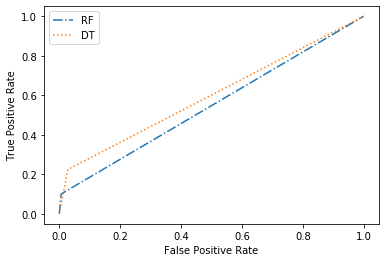

In [113]:
plt.plot(RF_fpr, RF_tpr, linestyle='-.', label='RF') 
plt.plot(DT_fpr, DT_tpr, linestyle=':', label='DT') 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
# show the plot
plt.show()
## comparing DT and RF models using roc curve 

In [114]:
ca.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,month,days_to_trend,trending_binary
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002,0.005883,-0.014666,-0.097649
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928,0.020280,0.000587,0.308172
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953,0.028157,-0.002967,0.229870
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636,0.029236,-0.000419,0.110328
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117,0.025185,-0.002878,0.153992
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092,-0.014315,-0.002500,0.022292
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131,0.006077,-0.002175,0.004010
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000,-0.011958,-0.000287,0.016975
month,0.005883,0.020280,0.028157,0.029236,0.025185,-0.014315,0.006077,-0.011958,1.000000,-0.002609,0.017078
days_to_trend,-0.014666,0.000587,-0.002967,-0.000419,-0.002878,-0.002500,-0.002175,-0.000287,-0.002609,1.000000,0.113925
